In [7]:
import os
import torch
import torch.nn as nn
from torchvision import datasets, models, transforms
from torch.utils.data import DataLoader
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np


In [3]:

# Configuración general
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
data_dir_base = r"Datos\Augmented"
conjuntos = ["conjunto_raw", "conjunto_bilateral", "conjunto_canny"]
num_classes = 3
batch_size = 32
num_epochs = 10
learning_rate = 1e-4


In [4]:

# Transformaciones para las imágenes
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])


Entrenamiento

c:\Users\dwigh\AppData\Local\Programs\Python\Python312\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\dwigh\AppData\Local\Programs\Python\Python312\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Época 1/10 - Pérdida: 0.2739
Época 2/10 - Pérdida: 0.0653
Época 3/10 - Pérdida: 0.0260
Época 4/10 - Pérdida: 0.0051
Época 5/10 - Pérdida: 0.0013
Época 6/10 - Pérdida: 0.0005
Época 7/10 - Pérdida: 0.0004
Época 8/10 - Pérdida: 0.0001
Época 9/10 - Pérdida: 0.0150
Época 10/10 - Pérdida: 0.0074
Modelo guardado: vgg16_conjunto_raw.pth
 Generando matriz de confusión para conjunto_raw...


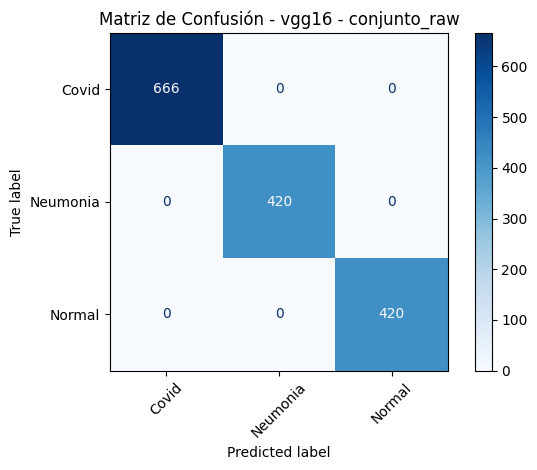

c:\Users\dwigh\AppData\Local\Programs\Python\Python312\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\dwigh\AppData\Local\Programs\Python\Python312\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Época 1/10 - Pérdida: 0.2788
Época 2/10 - Pérdida: 0.0501
Época 3/10 - Pérdida: 0.0240
Época 4/10 - Pérdida: 0.0131
Época 5/10 - Pérdida: 0.0137
Época 6/10 - Pérdida: 0.0013
Época 7/10 - Pérdida: 0.0019
Época 8/10 - Pérdida: 0.0014
Época 9/10 - Pérdida: 0.0003
Época 10/10 - Pérdida: 0.0017
Modelo guardado: vgg16_conjunto_bilateral.pth
 Generando matriz de confusión para conjunto_bilateral...


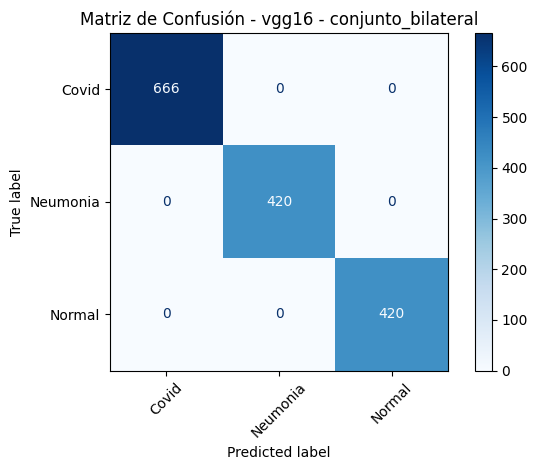

c:\Users\dwigh\AppData\Local\Programs\Python\Python312\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\dwigh\AppData\Local\Programs\Python\Python312\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Época 1/10 - Pérdida: 0.4414
Época 2/10 - Pérdida: 0.0744
Época 3/10 - Pérdida: 0.0247
Época 4/10 - Pérdida: 0.0170
Época 5/10 - Pérdida: 0.0069
Época 6/10 - Pérdida: 0.0028
Época 7/10 - Pérdida: 0.0059
Época 8/10 - Pérdida: 0.0019
Época 9/10 - Pérdida: 0.0005
Época 10/10 - Pérdida: 0.0003
Modelo guardado: vgg16_conjunto_canny.pth
 Generando matriz de confusión para conjunto_canny...


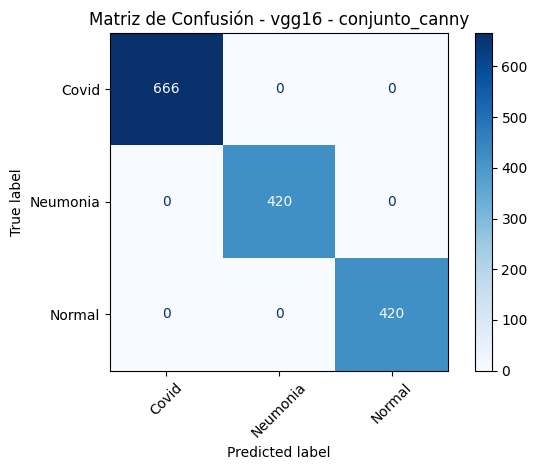

In [8]:
for conjunto in conjuntos:

    data_path = os.path.join(data_dir_base, conjunto)
    dataset = datasets.ImageFolder(data_path, transform=transform)
    dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

    #VGG16 
    model = models.vgg16(pretrained=True)

    for param in model.features.parameters():
        param.requires_grad = False

    model.classifier[6] = nn.Linear(4096, num_classes)
    model = model.to(device)

    # Definir función de pérdida y optimizador
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

    # Entrenamiento
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0

        for images, labels in dataloader:
            images = images.to(device)
            labels = labels.to(device)

            outputs = model(images)
            loss = criterion(outputs, labels)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        print(f"Época {epoch+1}/{num_epochs} - Pérdida: {running_loss / len(dataloader):.4f}")

    # Guardar modelo
    modelo_guardado = f"vgg16_{conjunto}.pth"
    torch.save(model.state_dict(), modelo_guardado)
    print(f"Modelo guardado: {modelo_guardado}")

    #Matris de confusion
    print(f" Generando matriz de confusión para {conjunto}...")
    model.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for images, labels in dataloader:
            images = images.to(device)
            labels = labels.to(device)
            outputs = model(images)
            _, preds = torch.max(outputs, 1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    cm = confusion_matrix(all_labels, all_preds)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dataset.classes)
    disp.plot(cmap='Blues', xticks_rotation=45)
    plt.title(f"Matriz de Confusión - vgg16 - {conjunto}")
    plt.tight_layout()
    plt.savefig(f"confusion_matrix_vgg16_{conjunto}.png")
    plt.show()
